# Covid-19_and_Pneumonia_X-Ray_Detector

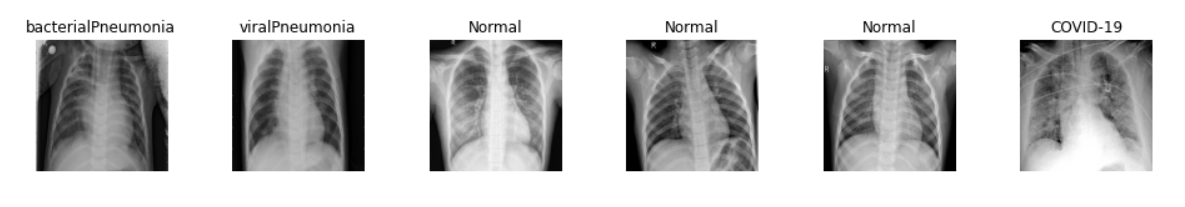

The main of this project is to detect Covid-19 from X-ray and also able to differentitate Covid-19 from viral pneumonia and bacterial pneumonia.
 I have created a custom dataset that contains covid-19 x-ray images, viral pneumonia x-ray images, bacterial pneumonia x-ray iamges and normal person x-ray images.Each class contains 133 images.

We have 4 clases{0,1,2,3} and 133*4= 532 images.
The 4 classes are:

<ol start="0">
<li> covid-19 
<li> normal
<li>viral pneumonia
<li> bacterial pneumonia

</ol>

The images are placed in subfolders labeled 0 to 3
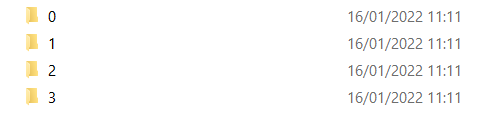

---


### Main obejective
The main objective is to build and train a convolution neural network as a baseline and predict which class type an image belongs to in the test phase, and then use a previously trained network, e.g. VGG, RESNET, TAKE ADVANTAGE OF TRANSFER LEARNING AND pass the data. and finally compare the results and draw conclusions . 

Build a CNN(with many layer) ,with filter 3x3,activation(Relu),pooling(Maxpooling),regularization(dropout),flatten ,3 o more layer dense and final clasification


## Library

In [1]:
import datetime
#! pip install opencv-python
from cv2 import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import  EarlyStopping, ModelCheckpoint

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd

## ImageDataGenerator
-Generate batches of tensor image data with real-time data augmentation.
- Generate batches of 32 images The total number of images is 133 * 4 = 532 images .

-Training will use 428 (80%) and validation will use 104 (20%) .

-Perform random checks and resize images .

In [3]:
train_directory="X_ray_image/Dataset/"

In [4]:
os.listdir(train_directory)

['0', '1', '2', '3']

In [5]:

image_generator = ImageDataGenerator(rescale=1./255, validation_split = 0.2)

In [ ]:
train_gener = image_generator.flow_from_directory(batch_size = 32, directory = train_directory, shuffle = True,
                                    target_size = (256, 256), class_mode = "categorical", subset = "training")

In [ ]:
testing_gener = image_generator.flow_from_directory(batch_size = 32, directory = train_directory, shuffle = True,
                                    target_size = (256, 256), class_mode = "categorical", subset = "validation")

In [12]:
X_image,y_label=next(train_gener)

In [13]:
X_image.shape

(32, 256, 256, 3)

In [14]:
y_label.shape

(32, 4)

In [16]:
y_label[2]

array([0., 0., 1., 0.], dtype=float32)

In [18]:
target_name = {0: 'COVID-19', 1: 'Normal', 2: 'viralPneumonia', 3: 'bacterialPneumonia'}

### Plot the images and labels

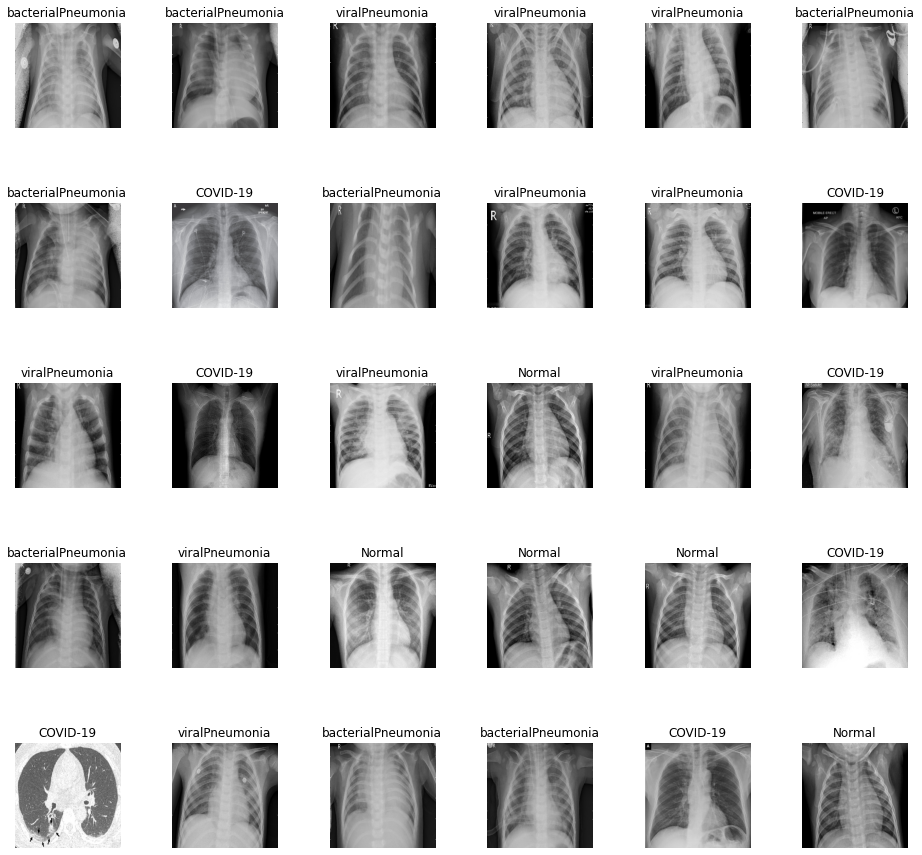

In [21]:
#dim 5*6 =30 images for plot
L = 5
W = 6

fig, axes = plt.subplots(L, W, figsize = (16,16))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_image[i])
    axes[i].set_title(target_name[np.argmax(y_label[i])])
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5)

## MODEL CNN:

Structure:{

   - Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool ->Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification}
   
  - Total params: 55,535,652  
     
  - Compile (optimezer=Rmsprop) ,I tried adam previously and it gave me bad results .
      
  - Monitor Stop->EarlyStopping  
   
  - Fit the model .
  - plot Accuacy and loss Function

In [97]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_image.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

In [98]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 activation_13 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 254, 254, 32)      9248      
                                                                 
 activation_14 (Activation)  (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout_15 (Dropout)        (None, 127, 127, 32)      0         
                                                      

In [99]:
import tensorflow as tf

In [100]:
# initiate RMSprop optimizer
opt = tf.keras.optimizers.RMSprop(learning_rate=1e-5,decay=1e-6)

# Let's train the model using rms
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

### Monitor stop
- Use early stop to exit training if validation loss won't decrease even after certain epochs (patience) .
- Store the best model with the least loss in validation

In [101]:
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# Store the best model with the least loss in validation
checkpointer = ModelCheckpoint(filepath = "weights.hdf5", verbose = 1, save_best_only=True)

In [131]:
now = datetime.datetime.now
now()

datetime.datetime(2022, 1, 16, 19, 14, 31, 67289)

In [103]:
X = image_generator.flow_from_directory(batch_size =10, directory = train_directory, shuffle = True,
                                     target_size = (256, 256), class_mode = "categorical", subset = "training")

Y = image_generator.flow_from_directory(batch_size = 10, directory = train_directory, shuffle = True,
                                    target_size = (256, 256), class_mode = "categorical", subset = "validation")

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [104]:
t=now()
model.fit(X,
              epochs=20,
              validation_data=Y,
              shuffle=True,callbacks=[earlystopping,checkpointer])

print('Training time: %s' % (now() - t))

Epoch 1/20
43/43 [==============================] - ETA: 0s - loss: 1.3778 - accuracy: 0.2921
Epoch 00001: val_loss improved from inf to 1.37286, saving model to weights.hdf5
43/43 [==============================] - 136s 3s/step - loss: 1.3778 - accuracy: 0.2921 - val_loss: 1.3729 - val_accuracy: 0.2500
Epoch 2/20
43/43 [==============================] - ETA: 0s - loss: 1.3357 - accuracy: 0.3715
Epoch 00002: val_loss improved from 1.37286 to 1.35476, saving model to weights.hdf5
43/43 [==============================] - 156s 4s/step - loss: 1.3357 - accuracy: 0.3715 - val_loss: 1.3548 - val_accuracy: 0.4712
Epoch 3/20
43/43 [==============================] - ETA: 0s - loss: 1.2970 - accuracy: 0.4229
Epoch 00003: val_loss improved from 1.35476 to 1.31720, saving model to weights.hdf5
43/43 [==============================] - 159s 4s/step - loss: 1.2970 - accuracy: 0.4229 - val_loss: 1.3172 - val_accuracy: 0.5288
Epoch 4/20
43/43 [==============================] - ETA: 0s - loss: 1.2080 - 

In [46]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot Accuracy and LossFunction Model

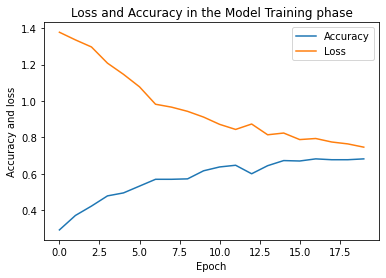

In [105]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['loss'])

plt.title("Loss and Accuracy in the Model Training phase")
plt.xlabel("Epoch")
plt.ylabel("Accuracy and loss")
plt.legend(["Accuracy", "Loss"])

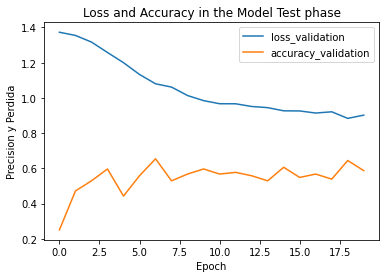

In [107]:
plt.plot(model.history.history['val_loss'])
plt.plot(model.history.history['val_accuracy'])

plt.title("Loss and Accuracy in the Model Test phase")
plt.xlabel("Epoch")
plt.ylabel("Precision y Perdida")
plt.legend(["loss_validation","accuracy_validation"])

## Import Pre-trained model

-  Restnet50
-  Use  wieght of ImageNet https://image-net.org/
-  Use Transfer Learning  
-  Bild a model use output of resnet and add dense layer 
-  Compile and fit like previous Model .
-  plot Loss function and accuracy .



#### Restnet50
ResNet50 is a convolutional neural network which has a depth of 50 layers. It was build and trained by Microsoft in 2015 and you can access the model performance results on their paper, titled Deep Residual Learning for Image Recognition. This model is also trained on more than 1 million images from the ImageNet database. Just like VGG-19, it can classify up to 1000 objects and the network was trained on 224x224 pixels colored images. Here is brief info about its size and performance:
Size: 98 MB : 

Top-1: Accuracy: 74.9%
Top-5: Accuracy: 92.1%
Number of Parameters: 25,636,712

In [50]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input

#### Use  wieght of ImageNet
ImageNet is an image database organized according to the WordNet hierarchy (currently only the nouns), in which each node of the hierarchy is depicted by hundreds and thousands of images. The project has been instrumental in advancing computer vision and deep learning research. The data is available for free to researchers for non-commercial use.
https://image-net.org/


In [108]:
model_RestNet = ResNet50(weights = "imagenet", include_top = False, input_tensor = Input(shape = (256, 256, 3)))

In [109]:
model_RestNet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

## Transfer Learning :
### Freezing Layers
Keras allows layers to be "frozen" during the training process.  That is, some layers would have their weights updated during the training process, while others would not.  This is a core part of transfer learning, the ability to train just the last one or several layers.

Note also, that a lot of the training time is spent "back-propagating" the gradients back to the first layer.  Therefore, if we only need to compute the gradients back a small number of layers, the training time is much quicker per iteration.  This is in addition to the savings gained by being able to train on a smaller data set.

In [110]:
#let's freeze the last layers
for layer in model_RestNet.layers[:-10]:
    layer.trainable = False

In [132]:
#model_RestNet.summary()

In [112]:
from tensorflow.keras.models import Model


In [113]:
model_RestNet.output


<KerasTensor: shape=(None, 8, 8, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [114]:
headmodel = model_RestNet.output
headmodel = MaxPooling2D(pool_size=(2,2))(headmodel)
headmodel = Flatten(name = 'flatten')(headmodel)
headmodel = Dense(512, activation = 'relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation = 'relu')(headmodel)
headmodel = Dropout(0.5)(headmodel)

headmodel = Dense(4, activation = 'softmax')(headmodel)

model_2 = Model(inputs = model_RestNet.input, outputs = headmodel)

### We are going to use the same configuration of our base model

In [115]:
model_2.compile(loss = 'categorical_crossentropy', optimizer =opt, metrics = ["accuracy"])

In [116]:
#fit yhe new model 
t=now()
model_2.fit(X,
              
              epochs=20,
              validation_data=Y,
              shuffle=True,callbacks=[earlystopping,checkpointer])

print('Training time: %s' % (now() - t))

Epoch 1/20
43/43 [==============================] - ETA: 0s - loss: 1.7352 - accuracy: 0.3762
Epoch 00001: val_loss did not improve from 0.88358
43/43 [==============================] - 55s 1s/step - loss: 1.7352 - accuracy: 0.3762 - val_loss: 1.7909 - val_accuracy: 0.2500
Epoch 2/20
43/43 [==============================] - ETA: 0s - loss: 1.1502 - accuracy: 0.4836
Epoch 00002: val_loss did not improve from 0.88358
43/43 [==============================] - 51s 1s/step - loss: 1.1502 - accuracy: 0.4836 - val_loss: 1.9699 - val_accuracy: 0.2500
Epoch 3/20
43/43 [==============================] - ETA: 0s - loss: 1.0194 - accuracy: 0.5607
Epoch 00003: val_loss did not improve from 0.88358
43/43 [==============================] - 51s 1s/step - loss: 1.0194 - accuracy: 0.5607 - val_loss: 2.2712 - val_accuracy: 0.2500
Epoch 4/20
43/43 [==============================] - ETA: 0s - loss: 0.8830 - accuracy: 0.6308
Epoch 00004: val_loss did not improve from 0.88358
43/43 [==========================

C:\Users\loli\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


43/43 [==============================] - 52s 1s/step - loss: 0.5755 - accuracy: 0.7850 - val_loss: 0.8368 - val_accuracy: 0.6346
Epoch 11/20
43/43 [==============================] - ETA: 0s - loss: 0.5678 - accuracy: 0.7827
Epoch 00011: val_loss improved from 0.83675 to 0.70761, saving model to weights.hdf5
43/43 [==============================] - 52s 1s/step - loss: 0.5678 - accuracy: 0.7827 - val_loss: 0.7076 - val_accuracy: 0.7115
Epoch 12/20
43/43 [==============================] - ETA: 0s - loss: 0.5798 - accuracy: 0.7570
Epoch 00012: val_loss improved from 0.70761 to 0.67028, saving model to weights.hdf5
43/43 [==============================] - 52s 1s/step - loss: 0.5798 - accuracy: 0.7570 - val_loss: 0.6703 - val_accuracy: 0.7115
Epoch 13/20
43/43 [==============================] - ETA: 0s - loss: 0.5650 - accuracy: 0.7710
Epoch 00013: val_loss improved from 0.67028 to 0.59331, saving model to weights.hdf5
43/43 [==============================] - 52s 1s/step - loss: 0.5650 - acc

### Plot Accuracy and LossFunction Model_2

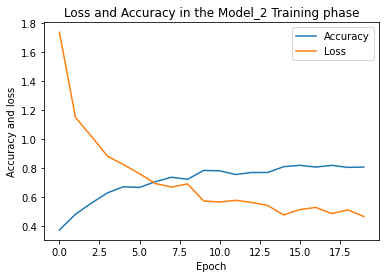

In [117]:
plt.plot(model_2.history.history['accuracy'])
plt.plot(model_2.history.history['loss'])

plt.title("Loss and Accuracy in the Model_2 Training phase")
plt.xlabel("Epoch")
plt.ylabel("Accuracy and loss")
plt.legend(["Accuracy", "Loss"])

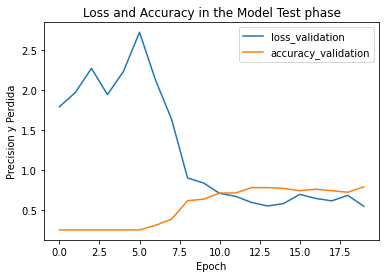

In [118]:
plt.plot(model_2.history.history['val_loss'])
plt.plot(model_2.history.history['val_accuracy'])

plt.title("Loss and Accuracy in the Model Test phase")
plt.xlabel("Epoch")
plt.ylabel("Precision y Perdida")
plt.legend(["loss_validation","accuracy_validation"])

## Comparison of both models .
We can appreciate the diference between both models  ,  the secound model execution time is shortened to 17 min instead of 55 min  and  the accuracy rises up to 80% in the training phase and up to 70% in the validation phase, we reach this good result just only with two dense layers harnessing the power of the Resnet neural network .

## Evaluation of the models
- Import a test directoty .

- Choose a best Model 

- Plot the Prediction of the winning model.

### Import a test directoty

Test_directory have 40 image 10 for every clase

In [92]:
test_directory="X_ray_image/Test/"

In [ ]:

test = ImageDataGenerator(rescale = 1./255)

test_gener = test.flow_from_directory(batch_size=4, directory=test_directory, shuffle=True, target_size=(256, 256), class_mode="categorical")


#### Evaluate the first model 
 Loss=1.01 .
 
 Accuracy=0.5 

In [124]:

evaluate = model.evaluate(test_gener, verbose = 1)

print("loss,Accuracy in the test phase model baseline : {}".format(evaluate))

Found 40 images belonging to 4 classes.
10/10 [==============================] - 2s 181ms/step - loss: 1.0160 - accuracy: 0.5000
loss,Accuracy in the test phase model baseline : [1.0160104036331177, 0.5]


#### Evaluate the second model 
 Loss=0.87 .
 
 Accuracy~0.7 

In [123]:
evaluate_2 = model_2.evaluate(test_gener, verbose = 1)

print("loss,Accuracy in the test phase Rsetnet : {}".format(evaluate_2))

10/10 [==============================] - 4s 362ms/step - loss: 0.8744 - accuracy: 0.7000
loss,Accuracy in the test phase Rsetnet : [0.874372124671936, 0.699999988079071]


### Choose a best Model 
I choose the previously trained Model_2 since it obtains a good result without going deeper into the network, the first model is not bad but it needs a lot of time and hardware to optimize it

## Plot Prediction

In [126]:
prediction = []
original = []
image = []

for i in range(len(os.listdir(test_directory))):
    for item in os.listdir(os.path.join(test_directory, str(i))):
        img = cv2.imread(os.path.join(test_directory, str(i), item))
        img = cv2.resize(img, (256,256))
        image.append(img)
        img = img/255
        img = img.reshape(-1, 256, 256, 3)
        predict = model_2.predict(img)
        predict = np.argmax(predict)
        prediction.append(predict)
        original.append(i)

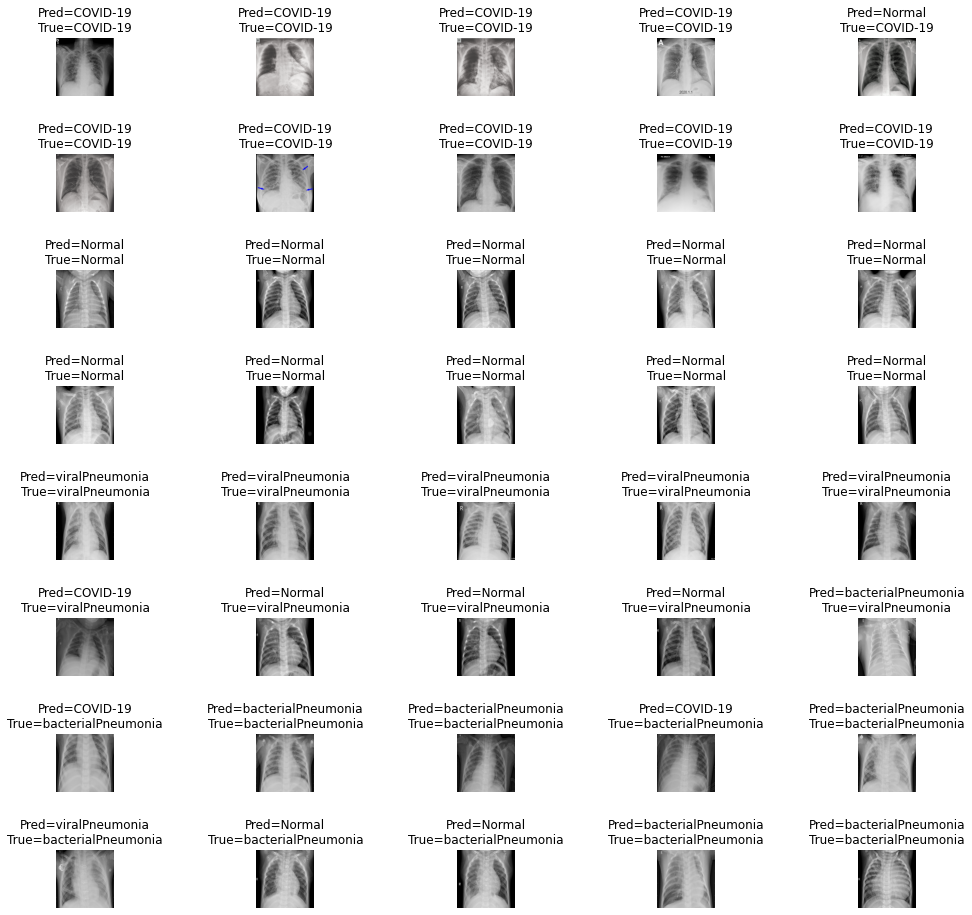

In [130]:
L = 8
W = 5

fig, axes = plt.subplots(L, W, figsize = (16,16))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(image[i])
    axes[i].set_title("Pred={}\nTrue={}".format(str(target_name[prediction[i]]), str(target_name[original[i]])))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1.2, hspace=1)

## Conclusion and Insights and key findings

The data set itself is small, only 533 images compared to mnist data set or imageNET, because it is not possible to have as many x-rays of covid-19 or other pathologies due to the privacy policy of medical centers, therefore Muy CNN which builds before, will have a hard time learning to classify the images well, while using Resnet which is already previously trained, it was able to recognize the images with a good percentage.

-One can spend a lot of time training the convolution network weighing in the architecture the hyperparameter layers etc..., and then have a lot of gpu resources to be able to train said network, but thanks to the pre-trained networks we can take advantage of their knowledge acquired through transfer learning to train our model. 

## Next step

first we will have to search for more data and enrich the dataset, perhaps distribute the classes not uniformly so that the network learns from a reel situation.
Second build a new CNN with more layers, change the kernel for example 2x2 or 5x5, use batchNormalizer instead of dropout, tune pooling choose AveragePooling  and tune hyperparameters(learning rate , optimezers etc..) for example and finally create more dense layers 

__Batch Normalization__:
It is used to normalize the output of the previous layers. The activations scale the input layer in normalization. Using batch normalization learning becomes efficient also it can be used as regularization to avoid overfitting of the model. The layer is added to the sequential model to standardize the input or the outputs .

If we choose pre-trained Model  we can deepen the dense layers, adding more layers for example two 512 another two 256 and another two 128, and another two 64 and see how the network is shared, more or less regularization ,tune hyperparameters like optimezer(Sgd,Adam ,Adamax etc..) ,tune learningRate .

we can test the effectiveness of other models such as  efficientNet from google,Vgg,inception etc..